In [5]:
import pandas as pd
import numpy as np

In [6]:
df_main = pd.read_csv('twitter_archive_master.csv')

In [7]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2059 non-null   int64  
 1   timestamp         2059 non-null   object 
 2   source            2059 non-null   object 
 3   text              2059 non-null   object 
 4   rating_out_of_10  2059 non-null   int64  
 5   name              2059 non-null   object 
 6   floofer           2059 non-null   object 
 7   classification    2059 non-null   object 
 8   jpg_url           2059 non-null   object 
 9   img_num           2059 non-null   int64  
 10  p1                2059 non-null   object 
 11  p1_conf           2059 non-null   float64
 12  p1_dog            2059 non-null   bool   
 13  p2                2059 non-null   object 
 14  p2_conf           2059 non-null   float64
 15  p2_dog            2059 non-null   bool   
 16  p3                2059 non-null   object 


In [38]:
df_main.sample(20)

,tweet_id,timestamp,source,text,rating_out_of_10,name,floofer,classification,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1292,689275259254616065,2016-01-19 02:36:42+00:00,Twitter for iPhone,Meet Lucky. He was showing his friends an extr...,10,Lucky,No,unknown,https://pbs.twimg.com/media/CZDMMY0WEAAQYjQ.jpg,1,...,0.215161,True,Chesapeake Bay Retriever,0.079051,True,Doberman,0.070226,True,235,1111
1104,705239209544720384,2016-03-03 03:51:44+00:00,Twitter for iPhone,This is Jimothy. He lost his body during the t...,11,Jimothy,No,unknown,https://pbs.twimg.com/media/CcmDUjFW8AAqAjc.jpg,1,...,0.157950,True,Toy Terrier,0.089920,True,Mexican Hairless,0.063225,True,727,2903
1373,684097758874210310,2016-01-04 19:43:10+00:00,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,10,Lupe,No,unknown,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,1,...,0.627856,True,German Short-Haired Pointer,0.173675,True,Chesapeake Bay Retriever,0.041342,True,1383,3980
668,767191397493538821,2016-08-21 02:47:37+00:00,Twitter for iPhone,I don't know any of the backstory behind this ...,13,None,No,doggo,https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg,1,...,0.708665,False,Boathouse,0.110056,False,Pier,0.039532,False,3674,12093
1255,691675652215414786,2016-01-25 17:35:00+00:00,Twitter for iPhone,This is Richie and Plip. They are the best of ...,10,Richie,No,unknown,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,...,0.182898,True,Teddy,0.128077,False,West Highland White Terrier,0.097875,True,493,1898
20,887705289381826560,2017-07-19 16:06:48+00:00,Twitter for iPhone,This is Jeffrey. He has a monopoly on the pool...,13,Jeffrey,No,unknown,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,...,0.821664,True,Redbone,0.087582,True,Weimaraner,0.026236,True,4762,27716
852,742161199639494656,2016-06-13 01:06:33+00:00,Twitter for iPhone,This is Doug. He's trying to float away. 12/10...,12,Doug,No,unknown,https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg,1,...,0.990736,False,Punching Bag,0.004754,False,Parachute,0.000436,False,1321,4201
1031,710997087345876993,2016-03-19 01:11:29+00:00,Twitter for iPhone,Meet Milo and Amos. They are the best of pals....,12,Milo,No,unknown,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,1,...,0.281260,True,Eskimo Dog,0.232641,True,Pembroke,0.091602,True,1334,4421
691,762035686371364864,2016-08-06 21:20:40+00:00,Twitter for iPhone,This left me speechless. 14/10 heckin heroic a...,14,None,No,unknown,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1,...,0.063152,False,Cash Machine,0.046692,False,Theater Curtain,0.046277,False,15184,31242
1914,668623201287675904,2015-11-23 02:52:48+00:00,Twitter for iPhone,This is Jomathan. He is not thrilled about the...,10,Jomathan,No,unknown,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,...,0.708163,True,Pomeranian,0.091372,True,Titi,0.067325,False,691,1320


# Insight 1: Does classification of dog associate with a higher rating?

In [8]:
df_insight_one = df_main[['rating_out_of_10', 'classification']]

In [9]:
df_insight_one.sample(5)

,rating_out_of_10,classification
86,12,unknown
369,11,unknown
1263,11,unknown
379,12,unknown
670,10,unknown


In [11]:
df_insight_one = df_insight_one.query('classification != "unknown"')

In [12]:
df_insight_one.classification.value_counts()

pupper    210
doggo      78
puppo      23
Name: classification, dtype: int64

In [20]:
graph1 = df_insight_one.groupby('classification')['rating_out_of_10'].mean().sort_values()
graph1

classification
pupper    10.752381
doggo     11.833333
puppo     12.000000
Name: rating_out_of_10, dtype: float64

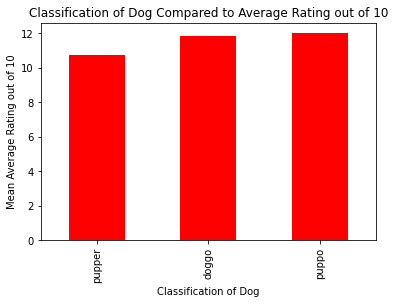

In [24]:
graph1.plot(kind = 'bar',
            title = 'Classification of Dog Compared to Average Rating out of 10',
            ylabel = 'Mean Average Rating out of 10',
            xlabel = 'Classification of Dog',
            color = 'red');

In [26]:
df_insight_two = df_main[['p1_dog', 'p2_dog', 'p3_dog']]

In [33]:
df_insight_two['p1_dog'].value_counts()

True     1520
False     539
Name: p1_dog, dtype: int64

In [37]:
print(1540/2059)

0.7479358912093249


In [30]:
df_insight_two['p2_dog'].value_counts()

True     1540
False     519
Name: p2_dog, dtype: int64

In [31]:
df_insight_two['p3_dog'].value_counts()

True     1487
False     572
Name: p3_dog, dtype: int64

In [41]:
df_insight_three = df_main.sort_values('retweet_count')

In [43]:
df_insight_three.tail(1)

,tweet_id,timestamp,source,text,rating_out_of_10,name,floofer,classification,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
838,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,None,No,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,...,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True,75130,151946


In [44]:
df_insight_four = df_main.sort_values('favorite_count')

In [45]:
df_insight_four.tail(1)

,tweet_id,timestamp,source,text,rating_out_of_10,name,floofer,classification,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
838,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,None,No,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,...,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True,75130,151946


In [49]:
df_insight_four[['jpg_url', 'p1']].tail(1)

,jpg_url,p1
838,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador Retriever
